# ***Домашняя работа №5***
## Терешин Кирилл Александрович 
### бфбо-03-24

## ***2.3.1. Загрузка данных и первичный анализ***

1. Импортировать необходимые библиотеки:

>- pandas и, при необходимости, numpy;
>- модули из scikit-learn: train_test_split, DummyClassifier, LogisticRegression, Pipeline, StandardScaler, метрики (accuracy_score, roc_auc_score и т.п.);
>- при желании – matplotlib/seaborn для графиков.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, roc_auc_score, 
                             roc_curve, confusion_matrix, 
                             classification_report)

2. Загрузить датасет S05-hw-dataset.csv в pandas.DataFrame с помощью pd.read_csv

In [13]:
url = '/Users/kirill/Desktop/aie-student-template/aie-group-Tereshin-BFBO-03-24/homeworks/HW05/S05-hw-dataset.csv'
data = pd.read_csv(url, sep=",")

3. Вывести и проанализировать:

>- первые строки датасета (head()),
>- информацию о столбцах и типах (info()),
>- базовые описательные статистики для числовых признаков (describe() или аналог),
>- распределение целевого признака default (например, через value_counts(normalize=True)).


In [14]:
data.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [15]:
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [16]:
data.value_counts(normalize=True)

client_id  age  income  years_employed  credit_score  debt_to_income  num_credit_cards  num_late_payments  has_mortgage  has_car_loan  savings_balance  checking_balance  region_risk_score  phone_calls_to_support_last_3m  active_loans  customer_tenure_years  default
1          25   94074   22              839           0.547339        1                 7                  0             0             26057             5229             0.080052           19                              1             8                      0          0.000333
2004       43   35470   26              538           0.307111        0                 11                 0             1             7070              4144             0.377450           0                               4             5                      1          0.000333
1995       57   106544  25              602           0.362523        4                 0                  1             0             27045             8240             0.326452

4. Кратко (несколько предложений) зафиксировать наблюдения:

>- сколько объектов и признаков в датасете;
>- есть ли явные аномалии (например, явно невозможные значения);
>- как распределён таргет (баланс классов).


1. датасет размером 3000 строк на 16 столбцов
2. у пользователя под id=1 стаж работы 22 года, а ему самому 25 лет
3. Данныен сбалансированы 

## ***2.3.2. Подготовка признаков и таргета***

1. Выделить матрицу признаков X и вектор таргета y:

>- таргет – столбец default;
>- в качестве признаков использовать все остальные осмысленные столбцы (кроме client_id, который можно удалить или не использовать в X).


In [18]:
x = data.drop(['default', 'client_id'], axis=1)
y = data['default']

2. При необходимости выполнить простую предобработку:

>- убедиться, что все используемые признаки числовые;
>- при желании можно явно проверить диапазоны (например, что debt_to_income в [0, 1]).


In [19]:
print(data.dtypes)

client_id                           int64
age                                 int64
income                              int64
years_employed                      int64
credit_score                        int64
debt_to_income                    float64
num_credit_cards                    int64
num_late_payments                   int64
has_mortgage                        int64
has_car_loan                        int64
savings_balance                     int64
checking_balance                    int64
region_risk_score                 float64
phone_calls_to_support_last_3m      int64
active_loans                        int64
customer_tenure_years               int64
default                             int64
dtype: object


3. Никаких сложных преобразований (one-hot, генерация фич и т.п.) не требуется – цель HW05 в другом. По желанию, вы можете их добавить, но это не обязательно для зачёта.



## ***2.3.3. Train/Test-сплит и бейзлайн-модель***

1. Разделить данные на обучающую и тестовую выборки:

>- использовать train_test_split из sklearn.model_selection;
>- разумное соотношение, например test_size=0.2 или 0.25;
>- важно: зафиксировать random_state (например, random_state=42), чтобы результаты были воспроизводимыми;
>- рекомендуется использовать stratify=y, чтобы сохранить баланс классов.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42, stratify=y)
print("Размер обучающей выборки:", x_train.shape)
print(f"Размер тестовой выборки: {x_test.shape}")

Размер обучающей выборки: (2250, 15)
Размер тестовой выборки: (750, 15)


2. Построить бейзлайн-модель на основе DummyClassifier:

>- например, strategy="most_frequent" или strategy="stratified";
>- обучить её на обучающей выборке (fit(X_train, y_train)).


In [21]:
dum_cls = DummyClassifier(strategy="most_frequent", random_state=42)
dum_cls.fit(x_train,y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

3. Оценить бейзлайн по крайней мере по двум метрикам:

>- accuracy на тестовой выборке;
>- ROC-AUC на тестовой выборке (если используете predict_proba или decision_function).


In [22]:
# Предсказания для бейзлайна
y_pred_dummy = dum_cls.predict(x_test)
y_pred_proba_dummy = dum_cls.predict_proba(x_test)[:, 1]

# Оценка бейзлайна
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_roc_auc = roc_auc_score(y_test, y_pred_proba_dummy)

4. Вывести значения метрик и коротко прокомментировать, что делает бейзлайн и почему важно иметь точку отсчёта

In [ ]:
dummy_accuracyprint(f" Accuracy: {:.4f}")
print(f" ROC-AUC: {dummy_roc_auc:.4f}")
print(f" Стратегия: '{dum_cls.strategy}' (всегда предсказывает самый частый класс)")

 Accuracy: 0.5893
 ROC-AUC: 0.5000
 Стратегия: 'most_frequent' (всегда предсказывает самый частый класс)


## ***2.3.4. Логистическая регрессия и подбор гиперпараметров***

1. Построить Pipeline, состоящий минимум из:

>- стандартизации признаков (StandardScaler);
>- логистической регрессии (LogisticRegression).


Примерно в таком духе (код можно оформить по-своему):
```
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])
```

In [24]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

2. Подобрать параметр регуляризации C (и при желании ещё 1-2 параметра) с помощью:

>- либо GridSearchCV;
>- либо простого перебора в цикле по нескольким значениям C (например, [0.01, 0.1, 1.0, 10.0]).


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

C_values = [0.01, 0.1, 1.0, 10.0]

for C in C_values:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(C=C, max_iter=1000))
    ])
    
    score = cross_val_score(pipe, x_train, y_train, cv=5).mean()
    print(f"C={C}: accuracy={score:.4f}")



C=0.01: accuracy=0.7893
C=0.1: accuracy=0.7871
C=1.0: accuracy=0.7876
C=10.0: accuracy=0.7876


3. Для лучшей найденной модели посчитать на тестовой выборке:

>- accuracy;
>- ROC-AUC;
>- по желанию: precision, recall, f1, confusion matrix.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score,
    confusion_matrix
)

# обучаем модель с лучшим C
best_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(C=0.01, max_iter=1000))
])

best_model.fit(x_train, y_train)

# предсказания
y_pred = best_model.predict(x_test)
y_proba = best_model.predict_proba(x_test)[:, 1]   # для ROC-AUC

# метрики
acc = accuracy_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("Accuracy:", acc)
print("ROC-AUC:", roc)

Accuracy: 0.7973333333333333
ROC-AUC: 0.8642754304519011


4. (Рекомендуется) Построить хотя бы один график:

>- ROC-кривая или PR-кривая (для этого можно использовать функции из sklearn.metrics + matplotlib).


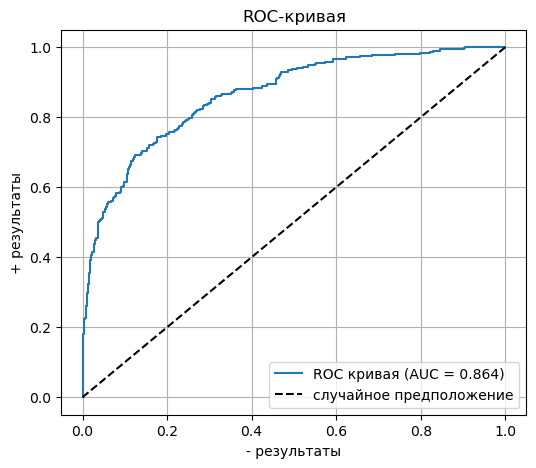

In [45]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# получаем вероятности класса 1
y_proba = best_model.predict_proba(x_test)[:, 1]

# считаем точки ROC-кривой
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# считаем площадь под кривой
roc_auc = auc(fpr, tpr)

# строим график
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC кривая (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="случайное предположение")

plt.xlabel("- результаты")
plt.ylabel("+ результаты")
plt.title("ROC-кривая")
plt.legend()
plt.grid(True)
plt.show()

5. Сохранить хотя бы один график (например, ROC-кривую) в файл в папку homeworks/HW05/figures/.

## ***2.3.5. Сравнение бейзлайна и логистической регрессии, текстовые выводы***


1. Свести результаты в компактный вид:

>- можно сделать небольшую табличку (например, pandas.DataFrame), где по строкам – модели (Dummy vs LogisticRegression), по столбцам – метрики;
>- либо просто аккуратно вывести все значения в текстовом виде.


In [46]:
import pandas as pd

results = pd.DataFrame({
    "accuracy": [dummy_accuracy, acc],
    "roc_auc": [dummy_roc_auc, roc]
}, index=["DummyClassifier", "LogisticRegression"])

print(results)

                    accuracy   roc_auc
DummyClassifier     0.589333  0.500000
LogisticRegression  0.797333  0.864275


2. В конце ноутбука написать краткий текстовый отчёт (5-10 предложений), в котором:

>- объяснить, чем бейзлайн отличается от логистической регрессии по качеству;
>- указать, насколько сильно выросла (или не выросла) accuracy и ROC-AUC;
>- при наличии нескольких значений C – прокомментировать, как изменение регуляризации влияло на качество;
>- сформулировать 2-3 простых вывода о том, какая модель кажется разумной для этой задачи и почему.


1. бейзлайн - простое угадывание, логистическая регрессия - модель, которая обучается.
2. В сравнении между бейзлайном и лог регрессии accuracy выросла на 0.2, а roc_auc на 0.36
3. При повышении С качество падало
4. Логистическая регрессия оказалась намного лучше бейзлайна, потому что она использует признаки и даёт более высокие метрики 